# SETUP

In [ ]:
import torch
import numpy as np
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchsummary import summary

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#DEFINE YOUR DEVICE
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device) #if cpu, go Runtime-> Change runtime type-> Hardware accelerator GPU -> Save -> Redo previous steps

cuda:0


In [ ]:
#DOWNLOAD CIFAR-10 DATASET
train_data = datasets.CIFAR10('./data', train = True, download = True, transform = transforms.ToTensor())

test_data = datasets.CIFAR10('./data', train = False, transform = transforms.ToTensor())

In [ ]:
#DEFINE DATA GENERATOR
batch_size = 100
train_generator = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True)
test_generator = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = False)

# QUESTIONS 

## Q1

In [ ]:
#DEFINE NEURAL NETWORK MODEL
class CNNQ1(torch.nn.Module):
  def __init__(self):
    super(CNNQ1, self).__init__()
    self.conv1 = torch.nn.Conv2d(3, 8, kernel_size = 4, stride = 1)
    self.conv2 = torch.nn.Conv2d(8, 16, kernel_size = 4, stride = 1)
    self.mpool = torch.nn.MaxPool2d(2)
    self.fc1 = torch.nn.Linear(400, 256)
    self.fc2 = torch.nn.Linear(256, 64)    
    self.fc3 = torch.nn.Linear(64, 10)
    self.relu = torch.nn.ReLU()
    self.sigmoid = torch.nn.Sigmoid()
    self.drop = torch.nn.Dropout(0.1)
  def forward(self, x):
    hidden = self.mpool(self.relu(self.conv1(x)))
    hidden = self.mpool(self.relu(self.conv2(hidden)))
    hidden = hidden.view(-1,400)
    hidden = self.relu(self.fc1(hidden))
    hidden = self.relu(self.fc2(hidden))
    output = self.fc3(hidden)
    return output

In [ ]:
#CREATE MODEL
model = CNNQ1()
model.to(device)

#DEFINE LOSS FUNCTION AND OPTIMIZER
learning_rate = 0.001

loss_fun = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# SUMMARY
summary(model,(3,32,32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 29, 29]             392
              ReLU-2            [-1, 8, 29, 29]               0
         MaxPool2d-3            [-1, 8, 14, 14]               0
            Conv2d-4           [-1, 16, 11, 11]           2,064
              ReLU-5           [-1, 16, 11, 11]               0
         MaxPool2d-6             [-1, 16, 5, 5]               0
            Linear-7                  [-1, 256]         102,656
              ReLU-8                  [-1, 256]               0
            Linear-9                   [-1, 64]          16,448
             ReLU-10                   [-1, 64]               0
           Linear-11                   [-1, 10]             650
Total params: 122,210
Trainable params: 122,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/

In [ ]:
#TRAIN THE MODEL
model.train()
epoch = 10

num_of_batch=np.int(len(train_generator.dataset)/batch_size)

loss_values = np.zeros(epoch*num_of_batch)
for i in range(epoch):
  for batch_idx, (x_train, y_train) in enumerate(train_generator):
    x_train, y_train = x_train.to(device), y_train.to(device)
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = loss_fun(y_pred, y_train)
    loss_values[num_of_batch*i+batch_idx] = loss.item()
    loss.backward()
    optimizer.step()
    if (batch_idx+1) % batch_size == 0:
        print('Epoch: {}/{} [Batch: {}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            i+1, epoch, (batch_idx+1) * len(x_train), len(train_generator.dataset),
            100. * (batch_idx+1) / len(train_generator), loss.item()))    

Epoch: 1/10 [Batch: 10000/50000 (20%)]	Loss: 2.008565
Epoch: 1/10 [Batch: 20000/50000 (40%)]	Loss: 1.707132
Epoch: 1/10 [Batch: 30000/50000 (60%)]	Loss: 1.772573
Epoch: 1/10 [Batch: 40000/50000 (80%)]	Loss: 1.631163
Epoch: 1/10 [Batch: 50000/50000 (100%)]	Loss: 1.389537
Epoch: 2/10 [Batch: 10000/50000 (20%)]	Loss: 1.421544
Epoch: 2/10 [Batch: 20000/50000 (40%)]	Loss: 1.322189
Epoch: 2/10 [Batch: 30000/50000 (60%)]	Loss: 1.521783
Epoch: 2/10 [Batch: 40000/50000 (80%)]	Loss: 1.428849
Epoch: 2/10 [Batch: 50000/50000 (100%)]	Loss: 1.630560
Epoch: 3/10 [Batch: 10000/50000 (20%)]	Loss: 1.351266
Epoch: 3/10 [Batch: 20000/50000 (40%)]	Loss: 1.573170
Epoch: 3/10 [Batch: 30000/50000 (60%)]	Loss: 1.297113
Epoch: 3/10 [Batch: 40000/50000 (80%)]	Loss: 1.258028
Epoch: 3/10 [Batch: 50000/50000 (100%)]	Loss: 1.333989
Epoch: 4/10 [Batch: 10000/50000 (20%)]	Loss: 1.322998
Epoch: 4/10 [Batch: 20000/50000 (40%)]	Loss: 1.046606
Epoch: 4/10 [Batch: 30000/50000 (60%)]	Loss: 1.205253
Epoch: 4/10 [Batch: 40000

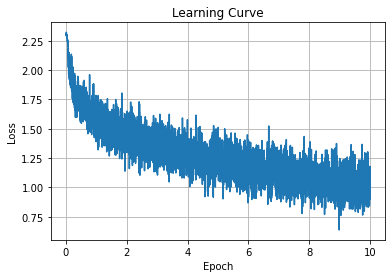

In [ ]:
#PLOT THE LEARNING CURVE
iterations = np.linspace(0,epoch,num_of_batch*epoch)
plt.plot(iterations, loss_values)
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid('on')
plt.savefig('drive/MyDrive/583_HW7/Q1.png')

In [ ]:
#TEST THE MODEL
model.eval()
correct=0
total=0

for x_val, y_val in test_generator:
  x_val = x_val.to(device)
  y_val = y_val.to(device)

  output = model(x_val)
  y_pred = output.argmax(dim=1)

  for i in range(y_pred.shape[0]):
    if y_val[i]==y_pred[i]:
      correct += 1
    total +=1

print('Validation accuracy: %.2f%%' %((100*correct)//(total)))  

Validation accuracy: 62.00%


## Q2
### Optimizer changed to SGD.

In [ ]:
#CREATE MODEL
model = CNNQ1()
model.to(device)

#DEFINE LOSS FUNCTION AND OPTIMIZER
learning_rate = 0.01

loss_fun = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum=0.9)

# SUMMARY
summary(model,(3,32,32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 29, 29]             392
              ReLU-2            [-1, 8, 29, 29]               0
         MaxPool2d-3            [-1, 8, 14, 14]               0
            Conv2d-4           [-1, 16, 11, 11]           2,064
              ReLU-5           [-1, 16, 11, 11]               0
         MaxPool2d-6             [-1, 16, 5, 5]               0
            Linear-7                  [-1, 256]         102,656
              ReLU-8                  [-1, 256]               0
            Linear-9                   [-1, 64]          16,448
             ReLU-10                   [-1, 64]               0
           Linear-11                   [-1, 10]             650
Total params: 122,210
Trainable params: 122,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/

In [ ]:
#TRAIN THE MODEL
model.train()
epoch = 10

num_of_batch=np.int(len(train_generator.dataset)/batch_size)

loss_values = np.zeros(epoch*num_of_batch)
for i in range(epoch):

  for batch_idx, (x_train, y_train) in enumerate(train_generator):
    x_train, y_train = x_train.to(device), y_train.to(device)
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = loss_fun(y_pred, y_train)
    loss_values[num_of_batch*i+batch_idx] = loss.item()
    loss.backward()
    optimizer.step()
    if (batch_idx+1) % batch_size == 0:
        print('Epoch: {}/{} [Batch: {}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            i+1, epoch, (batch_idx+1) * len(x_train), len(train_generator.dataset),
            100. * (batch_idx+1) / len(train_generator), loss.item()))    

Epoch: 1/10 [Batch: 10000/50000 (20%)]	Loss: 0.736044
Epoch: 1/10 [Batch: 20000/50000 (40%)]	Loss: 0.781371
Epoch: 1/10 [Batch: 30000/50000 (60%)]	Loss: 0.696068
Epoch: 1/10 [Batch: 40000/50000 (80%)]	Loss: 0.812954
Epoch: 1/10 [Batch: 50000/50000 (100%)]	Loss: 0.862274
Epoch: 2/10 [Batch: 10000/50000 (20%)]	Loss: 0.966946
Epoch: 2/10 [Batch: 20000/50000 (40%)]	Loss: 0.963485
Epoch: 2/10 [Batch: 30000/50000 (60%)]	Loss: 0.817716
Epoch: 2/10 [Batch: 40000/50000 (80%)]	Loss: 0.972773
Epoch: 2/10 [Batch: 50000/50000 (100%)]	Loss: 0.975334
Epoch: 3/10 [Batch: 10000/50000 (20%)]	Loss: 0.818820
Epoch: 3/10 [Batch: 20000/50000 (40%)]	Loss: 0.746322
Epoch: 3/10 [Batch: 30000/50000 (60%)]	Loss: 0.679832
Epoch: 3/10 [Batch: 40000/50000 (80%)]	Loss: 0.798428
Epoch: 3/10 [Batch: 50000/50000 (100%)]	Loss: 0.838489
Epoch: 4/10 [Batch: 10000/50000 (20%)]	Loss: 0.807739
Epoch: 4/10 [Batch: 20000/50000 (40%)]	Loss: 0.734484
Epoch: 4/10 [Batch: 30000/50000 (60%)]	Loss: 0.553443
Epoch: 4/10 [Batch: 40000

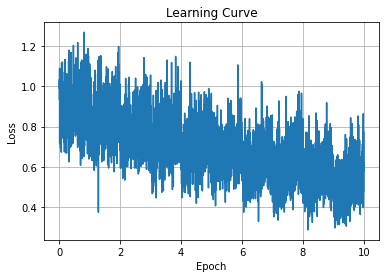

In [ ]:
#PLOT THE LEARNING CURVE
iterations = np.linspace(0,epoch,num_of_batch*epoch)
plt.plot(iterations, loss_values)
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid('on')
plt.savefig('drive/MyDrive/583_HW7/Q2.png')

In [ ]:
#TEST THE MODEL
model.eval()
correct=0
total=0

for x_val, y_val in test_generator:
  x_val = x_val.to(device)
  y_val = y_val.to(device)

  output = model(x_val)
  y_pred = output.argmax(dim=1)

  for i in range(y_pred.shape[0]):
    if y_val[i]==y_pred[i]:
      correct += 1
    total +=1

print('Validation accuracy: %.2f%%' %((100*correct)//(total)))  

Validation accuracy: 61.00%


**With LR = $0.01$ and Momentum = $0.9$, the validation accuracy was lower than that of Adam's. Hence, proceed with Adam.**




## Q3 
### Activation changed to sigmoid.

In [ ]:
#DEFINE NEURAL NETWORK MODEL
class CNNQ3(torch.nn.Module):
  def __init__(self):
    super(CNNQ3, self).__init__()
    self.conv1 = torch.nn.Conv2d(3, 8, kernel_size = 4, stride = 1)
    self.conv2 = torch.nn.Conv2d(8, 16, kernel_size = 4, stride = 1)
    self.mpool = torch.nn.MaxPool2d(2)
    self.fc1 = torch.nn.Linear(400, 256)
    self.fc2 = torch.nn.Linear(256, 64)    
    self.fc3 = torch.nn.Linear(64, 10)
    self.relu = torch.nn.ReLU()
    self.sigmoid = torch.nn.Sigmoid()
    self.drop = torch.nn.Dropout(0.1)
  def forward(self, x):
    hidden = self.mpool(self.sigmoid(self.conv1(x)))
    hidden = self.mpool(self.sigmoid(self.conv2(hidden)))
    hidden = hidden.view(-1,400)
    hidden = self.sigmoid(self.fc1(hidden))
    hidden = self.sigmoid(self.fc2(hidden))
    output = self.fc3(hidden)
    return output

In [ ]:
#CREATE MODEL
model = CNNQ3()
model.to(device)

#DEFINE LOSS FUNCTION AND OPTIMIZER
learning_rate = 0.001

loss_fun = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# SUMMARY
summary(model,(3,32,32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 29, 29]             392
           Sigmoid-2            [-1, 8, 29, 29]               0
         MaxPool2d-3            [-1, 8, 14, 14]               0
            Conv2d-4           [-1, 16, 11, 11]           2,064
           Sigmoid-5           [-1, 16, 11, 11]               0
         MaxPool2d-6             [-1, 16, 5, 5]               0
            Linear-7                  [-1, 256]         102,656
           Sigmoid-8                  [-1, 256]               0
            Linear-9                   [-1, 64]          16,448
          Sigmoid-10                   [-1, 64]               0
           Linear-11                   [-1, 10]             650
Total params: 122,210
Trainable params: 122,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/

In [ ]:
#TRAIN THE MODEL
model.train()
epoch = 10

num_of_batch=np.int(len(train_generator.dataset)/batch_size)

loss_values = np.zeros(epoch*num_of_batch)
for i in range(epoch):
  for batch_idx, (x_train, y_train) in enumerate(train_generator):
    x_train, y_train = x_train.to(device), y_train.to(device)
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = loss_fun(y_pred, y_train)
    loss_values[num_of_batch*i+batch_idx] = loss.item()
    loss.backward()
    optimizer.step()
    if (batch_idx+1) % batch_size == 0:
        print('Epoch: {}/{} [Batch: {}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            i+1, epoch, (batch_idx+1) * len(x_train), len(train_generator.dataset),
            100. * (batch_idx+1) / len(train_generator), loss.item()))    

Epoch: 1/10 [Batch: 10000/50000 (20%)]	Loss: 2.304116
Epoch: 1/10 [Batch: 20000/50000 (40%)]	Loss: 2.163043
Epoch: 1/10 [Batch: 30000/50000 (60%)]	Loss: 2.151380
Epoch: 1/10 [Batch: 40000/50000 (80%)]	Loss: 2.033580
Epoch: 1/10 [Batch: 50000/50000 (100%)]	Loss: 1.966078
Epoch: 2/10 [Batch: 10000/50000 (20%)]	Loss: 1.993485
Epoch: 2/10 [Batch: 20000/50000 (40%)]	Loss: 2.116996
Epoch: 2/10 [Batch: 30000/50000 (60%)]	Loss: 2.015048
Epoch: 2/10 [Batch: 40000/50000 (80%)]	Loss: 2.021232
Epoch: 2/10 [Batch: 50000/50000 (100%)]	Loss: 1.953170
Epoch: 3/10 [Batch: 10000/50000 (20%)]	Loss: 1.814739
Epoch: 3/10 [Batch: 20000/50000 (40%)]	Loss: 1.778557
Epoch: 3/10 [Batch: 30000/50000 (60%)]	Loss: 1.842888
Epoch: 3/10 [Batch: 40000/50000 (80%)]	Loss: 1.768866
Epoch: 3/10 [Batch: 50000/50000 (100%)]	Loss: 1.881565
Epoch: 4/10 [Batch: 10000/50000 (20%)]	Loss: 1.762808
Epoch: 4/10 [Batch: 20000/50000 (40%)]	Loss: 1.810751
Epoch: 4/10 [Batch: 30000/50000 (60%)]	Loss: 1.908579
Epoch: 4/10 [Batch: 40000

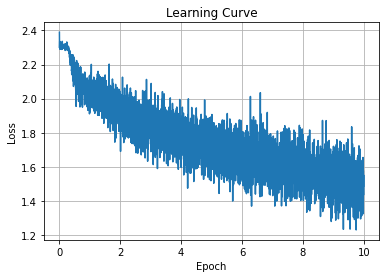

In [ ]:
#PLOT THE LEARNING CURVE
iterations = np.linspace(0,epoch,num_of_batch*epoch)
plt.plot(iterations, loss_values)
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid('on')
plt.savefig('drive/MyDrive/583_HW7/Q3.png')

In [ ]:
#TEST THE MODEL
model.eval()
correct=0
total=0

for x_val, y_val in test_generator:
  x_val = x_val.to(device)
  y_val = y_val.to(device)

  output = model(x_val)
  y_pred = output.argmax(dim=1)

  for i in range(y_pred.shape[0]):
    if y_val[i]==y_pred[i]:
      correct += 1
    total +=1

print('Validation accuracy: %.2f%%' %((100*correct)//(total)))  

Validation accuracy: 45.00%


**The network with activations Sigmoid, rather than ReLU, performed remarkably poorer, both in terms of training loss and validation accuracy. Returning back to ReLU.**

## Q4
### Increase the kernel size of convolutional layers

In [ ]:
#DEFINE NEURAL NETWORK MODEL
class CNNQ4(torch.nn.Module):
  def __init__(self):
    super(CNNQ4, self).__init__()
    self.conv1 = torch.nn.Conv2d(3, 8, kernel_size = 6, stride = 1)
    self.conv2 = torch.nn.Conv2d(8, 16, kernel_size = 6, stride = 1)
    self.mpool = torch.nn.MaxPool2d(2)
    self.fc1 = torch.nn.Linear(256, 256)
    self.fc2 = torch.nn.Linear(256, 64)    
    self.fc3 = torch.nn.Linear(64, 10)
    self.relu = torch.nn.ReLU()
    self.sigmoid = torch.nn.Sigmoid()
    self.drop = torch.nn.Dropout(0.1)
  def forward(self, x):
    hidden = self.mpool(self.relu(self.conv1(x)))
    hidden = self.mpool(self.relu(self.conv2(hidden)))
    hidden = hidden.view(-1,256)
    hidden = self.relu(self.fc1(hidden))
    hidden = self.relu(self.fc2(hidden))
    output = self.fc3(hidden)
    return output

In [ ]:
#CREATE MODEL
model = CNNQ4()
model.to(device)

#DEFINE LOSS FUNCTION AND OPTIMIZER
learning_rate = 0.001

loss_fun = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# SUMMARY
summary(model,(3,32,32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 27, 27]             872
              ReLU-2            [-1, 8, 27, 27]               0
         MaxPool2d-3            [-1, 8, 13, 13]               0
            Conv2d-4             [-1, 16, 8, 8]           4,624
              ReLU-5             [-1, 16, 8, 8]               0
         MaxPool2d-6             [-1, 16, 4, 4]               0
            Linear-7                  [-1, 256]          65,792
              ReLU-8                  [-1, 256]               0
            Linear-9                   [-1, 64]          16,448
             ReLU-10                   [-1, 64]               0
           Linear-11                   [-1, 10]             650
Total params: 88,386
Trainable params: 88,386
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/ba

In [ ]:
#TRAIN THE MODEL
model.train()
epoch = 10

num_of_batch=np.int(len(train_generator.dataset)/batch_size)

loss_values = np.zeros(epoch*num_of_batch)
for i in range(epoch):
  for batch_idx, (x_train, y_train) in enumerate(train_generator):
    x_train, y_train = x_train.to(device), y_train.to(device)
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = loss_fun(y_pred, y_train)
    loss_values[num_of_batch*i+batch_idx] = loss.item()
    loss.backward()
    optimizer.step()
    if (batch_idx+1) % batch_size == 0:
        print('Epoch: {}/{} [Batch: {}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            i+1, epoch, (batch_idx+1) * len(x_train), len(train_generator.dataset),
            100. * (batch_idx+1) / len(train_generator), loss.item()))    

Epoch: 1/10 [Batch: 10000/50000 (20%)]	Loss: 2.021697
Epoch: 1/10 [Batch: 20000/50000 (40%)]	Loss: 1.766634
Epoch: 1/10 [Batch: 30000/50000 (60%)]	Loss: 1.758830
Epoch: 1/10 [Batch: 40000/50000 (80%)]	Loss: 1.860762
Epoch: 1/10 [Batch: 50000/50000 (100%)]	Loss: 1.632864
Epoch: 2/10 [Batch: 10000/50000 (20%)]	Loss: 1.545504
Epoch: 2/10 [Batch: 20000/50000 (40%)]	Loss: 1.519792
Epoch: 2/10 [Batch: 30000/50000 (60%)]	Loss: 1.579289
Epoch: 2/10 [Batch: 40000/50000 (80%)]	Loss: 1.519796
Epoch: 2/10 [Batch: 50000/50000 (100%)]	Loss: 1.484550
Epoch: 3/10 [Batch: 10000/50000 (20%)]	Loss: 1.619676
Epoch: 3/10 [Batch: 20000/50000 (40%)]	Loss: 1.521780
Epoch: 3/10 [Batch: 30000/50000 (60%)]	Loss: 1.455799
Epoch: 3/10 [Batch: 40000/50000 (80%)]	Loss: 1.505249
Epoch: 3/10 [Batch: 50000/50000 (100%)]	Loss: 1.304922
Epoch: 4/10 [Batch: 10000/50000 (20%)]	Loss: 1.463613
Epoch: 4/10 [Batch: 20000/50000 (40%)]	Loss: 1.270110
Epoch: 4/10 [Batch: 30000/50000 (60%)]	Loss: 1.268965
Epoch: 4/10 [Batch: 40000

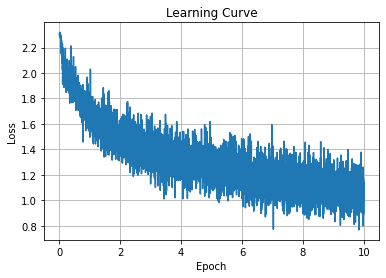

In [ ]:
#PLOT THE LEARNING CURVE
iterations = np.linspace(0,epoch,num_of_batch*epoch)
plt.plot(iterations, loss_values)
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid('on')
plt.savefig('drive/MyDrive/583_HW7/Q4.png')

In [ ]:
#TEST THE MODEL
model.eval()
correct=0
total=0

for x_val, y_val in test_generator:
  x_val = x_val.to(device)
  y_val = y_val.to(device)

  output = model(x_val)
  y_pred = output.argmax(dim=1)

  for i in range(y_pred.shape[0]):
    if y_val[i]==y_pred[i]:
      correct += 1
    total +=1

print('Validation accuracy: %.2f%%' %((100*correct)//(total)))  

Validation accuracy: 57.00%


**Increasing the kernel size decreased accuracy with respect to the Q1 network with Adams and Kernel size 4. This may be attributed to the decreased number of parameters in the network, due to the increased kernel size resulting in shrinked outputs, hence less number of parameters in the fully connected layers.Returning back to kernel size 4.**

## Q5
### Remove max pooling layers

In [ ]:
#DEFINE NEURAL NETWORK MODEL
class CNNQ5(torch.nn.Module):
  def __init__(self):
    super(CNNQ5, self).__init__()
    self.conv1 = torch.nn.Conv2d(3, 8, kernel_size = 4, stride = 1)
    self.conv2 = torch.nn.Conv2d(8, 16, kernel_size = 4, stride = 1)
    self.mpool = torch.nn.MaxPool2d(2)
    self.fc1 = torch.nn.Linear(10816, 256)
    self.fc2 = torch.nn.Linear(256, 64)    
    self.fc3 = torch.nn.Linear(64, 10)
    self.relu = torch.nn.ReLU()
    self.sigmoid = torch.nn.Sigmoid()
    self.drop = torch.nn.Dropout(0.1)
  def forward(self, x):
    hidden = (self.relu(self.conv1(x)))
    hidden = (self.relu(self.conv2(hidden)))
    hidden = hidden.view(-1,10816)
    hidden = self.relu(self.fc1(hidden))
    hidden = self.relu(self.fc2(hidden))
    output = self.fc3(hidden)
    return output

In [ ]:
#CREATE MODEL
model = CNNQ5()
model.to(device)

#DEFINE LOSS FUNCTION AND OPTIMIZER
learning_rate = 0.001

loss_fun = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# SUMMARY
summary(model,(3,32,32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 29, 29]             392
              ReLU-2            [-1, 8, 29, 29]               0
            Conv2d-3           [-1, 16, 26, 26]           2,064
              ReLU-4           [-1, 16, 26, 26]               0
            Linear-5                  [-1, 256]       2,769,152
              ReLU-6                  [-1, 256]               0
            Linear-7                   [-1, 64]          16,448
              ReLU-8                   [-1, 64]               0
            Linear-9                   [-1, 10]             650
Total params: 2,788,706
Trainable params: 2,788,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.27
Params size (MB): 10.64
Estimated Total Size (MB): 10.92
-------------------------------------

In [ ]:
#TRAIN THE MODEL
model.train()
epoch = 10

num_of_batch=np.int(len(train_generator.dataset)/batch_size)

loss_values = np.zeros(epoch*num_of_batch)
for i in range(epoch):
  for batch_idx, (x_train, y_train) in enumerate(train_generator):
    x_train, y_train = x_train.to(device), y_train.to(device)
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = loss_fun(y_pred, y_train)
    loss_values[num_of_batch*i+batch_idx] = loss.item()
    loss.backward()
    optimizer.step()
    if (batch_idx+1) % batch_size == 0:
        print('Epoch: {}/{} [Batch: {}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            i+1, epoch, (batch_idx+1) * len(x_train), len(train_generator.dataset),
            100. * (batch_idx+1) / len(train_generator), loss.item()))    

Epoch: 1/10 [Batch: 10000/50000 (20%)]	Loss: 0.397587
Epoch: 1/10 [Batch: 20000/50000 (40%)]	Loss: 0.354198
Epoch: 1/10 [Batch: 30000/50000 (60%)]	Loss: 0.419669
Epoch: 1/10 [Batch: 40000/50000 (80%)]	Loss: 0.300957
Epoch: 1/10 [Batch: 50000/50000 (100%)]	Loss: 0.445359
Epoch: 2/10 [Batch: 10000/50000 (20%)]	Loss: 0.202522
Epoch: 2/10 [Batch: 20000/50000 (40%)]	Loss: 0.258415
Epoch: 2/10 [Batch: 30000/50000 (60%)]	Loss: 0.422641
Epoch: 2/10 [Batch: 40000/50000 (80%)]	Loss: 0.271738
Epoch: 2/10 [Batch: 50000/50000 (100%)]	Loss: 0.308269
Epoch: 3/10 [Batch: 10000/50000 (20%)]	Loss: 0.104597
Epoch: 3/10 [Batch: 20000/50000 (40%)]	Loss: 0.201747
Epoch: 3/10 [Batch: 30000/50000 (60%)]	Loss: 0.166502
Epoch: 3/10 [Batch: 40000/50000 (80%)]	Loss: 0.178280
Epoch: 3/10 [Batch: 50000/50000 (100%)]	Loss: 0.145707
Epoch: 4/10 [Batch: 10000/50000 (20%)]	Loss: 0.165880
Epoch: 4/10 [Batch: 20000/50000 (40%)]	Loss: 0.080247
Epoch: 4/10 [Batch: 30000/50000 (60%)]	Loss: 0.093291
Epoch: 4/10 [Batch: 40000

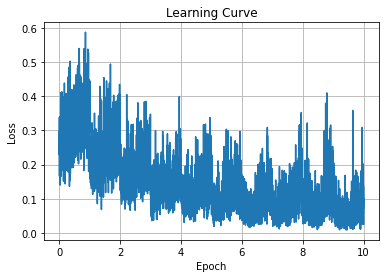

In [ ]:
#PLOT THE LEARNING CURVE
iterations = np.linspace(0,epoch,num_of_batch*epoch)
plt.plot(iterations, loss_values)
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid('on')
plt.savefig('drive/MyDrive/583_HW7/Q5.png')

In [ ]:
#TEST THE MODEL
model.eval()
correct=0
total=0

for x_val, y_val in test_generator:
  x_val = x_val.to(device)
  y_val = y_val.to(device)

  output = model(x_val)
  y_pred = output.argmax(dim=1)

  for i in range(y_pred.shape[0]):
    if y_val[i]==y_pred[i]:
      correct += 1
    total +=1

print('Validation accuracy: %.2f%%' %((100*correct)//(total)))  

Validation accuracy: 59.00%


**Removing the max pool layers resulted in a significant decrease in training loss due to the overfitting caused from increased number of network parameters with a slight decrease in the validation accuracy. This is somehow parallel with the expectations since one would expect the network would perform poorer in the absence of decreased nonlinearity of max pool layers.**

## Q6
### A convolutional layer is added. 

In [ ]:
#DEFINE NEURAL NETWORK MODEL
class CNNQ6(torch.nn.Module):
  def __init__(self):
    super(CNNQ6, self).__init__()
    self.conv1 = torch.nn.Conv2d(3, 8, kernel_size = 4, stride = 1)
    self.conv2 = torch.nn.Conv2d(8, 16, kernel_size = 4, stride = 1)
    self.conv3 = torch.nn.Conv2d(16, 32, kernel_size = 4, stride = 1)
    self.mpool = torch.nn.MaxPool2d(2)
    self.fc1 = torch.nn.Linear(32, 256)
    self.fc2 = torch.nn.Linear(256, 64)    
    self.fc3 = torch.nn.Linear(64, 10)
    self.relu = torch.nn.ReLU()
    self.sigmoid = torch.nn.Sigmoid()
    self.drop = torch.nn.Dropout(0.1)
  def forward(self, x):
    hidden = self.mpool(self.relu(self.conv1(x)))
    hidden = self.mpool(self.relu(self.conv2(hidden)))
    hidden = self.mpool(self.relu(self.conv3(hidden)))
    hidden = hidden.view(-1,32)
    hidden = self.relu(self.fc1(hidden))
    hidden = self.relu(self.fc2(hidden))
    output = self.fc3(hidden)
    return output

In [ ]:
#CREATE MODEL
model = CNNQ6()
model.to(device)

#DEFINE LOSS FUNCTION AND OPTIMIZER
learning_rate = 0.001

loss_fun = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# SUMMARY
summary(model,(3,32,32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 29, 29]             392
              ReLU-2            [-1, 8, 29, 29]               0
         MaxPool2d-3            [-1, 8, 14, 14]               0
            Conv2d-4           [-1, 16, 11, 11]           2,064
              ReLU-5           [-1, 16, 11, 11]               0
         MaxPool2d-6             [-1, 16, 5, 5]               0
            Conv2d-7             [-1, 32, 2, 2]           8,224
              ReLU-8             [-1, 32, 2, 2]               0
         MaxPool2d-9             [-1, 32, 1, 1]               0
           Linear-10                  [-1, 256]           8,448
             ReLU-11                  [-1, 256]               0
           Linear-12                   [-1, 64]          16,448
             ReLU-13                   [-1, 64]               0
           Linear-14                   

In [ ]:
#TRAIN THE MODEL
model.train()
epoch = 10

num_of_batch=np.int(len(train_generator.dataset)/batch_size)

loss_values = np.zeros(epoch*num_of_batch)
for i in range(epoch):
  for batch_idx, (x_train, y_train) in enumerate(train_generator):
    x_train, y_train = x_train.to(device), y_train.to(device)
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = loss_fun(y_pred, y_train)
    loss_values[num_of_batch*i+batch_idx] = loss.item()
    loss.backward()
    optimizer.step()
    if (batch_idx+1) % batch_size == 0:
        print('Epoch: {}/{} [Batch: {}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            i+1, epoch, (batch_idx+1) * len(x_train), len(train_generator.dataset),
            100. * (batch_idx+1) / len(train_generator), loss.item()))    

Epoch: 1/10 [Batch: 10000/50000 (20%)]	Loss: 2.226628
Epoch: 1/10 [Batch: 20000/50000 (40%)]	Loss: 1.937245
Epoch: 1/10 [Batch: 30000/50000 (60%)]	Loss: 1.870508
Epoch: 1/10 [Batch: 40000/50000 (80%)]	Loss: 1.777901
Epoch: 1/10 [Batch: 50000/50000 (100%)]	Loss: 1.813008
Epoch: 2/10 [Batch: 10000/50000 (20%)]	Loss: 1.651842
Epoch: 2/10 [Batch: 20000/50000 (40%)]	Loss: 1.741103
Epoch: 2/10 [Batch: 30000/50000 (60%)]	Loss: 1.607360
Epoch: 2/10 [Batch: 40000/50000 (80%)]	Loss: 1.631606
Epoch: 2/10 [Batch: 50000/50000 (100%)]	Loss: 1.629384
Epoch: 3/10 [Batch: 10000/50000 (20%)]	Loss: 1.708601
Epoch: 3/10 [Batch: 20000/50000 (40%)]	Loss: 1.505062
Epoch: 3/10 [Batch: 30000/50000 (60%)]	Loss: 1.473297
Epoch: 3/10 [Batch: 40000/50000 (80%)]	Loss: 1.248842
Epoch: 3/10 [Batch: 50000/50000 (100%)]	Loss: 1.375444
Epoch: 4/10 [Batch: 10000/50000 (20%)]	Loss: 1.539607
Epoch: 4/10 [Batch: 20000/50000 (40%)]	Loss: 1.452272
Epoch: 4/10 [Batch: 30000/50000 (60%)]	Loss: 1.448867
Epoch: 4/10 [Batch: 40000

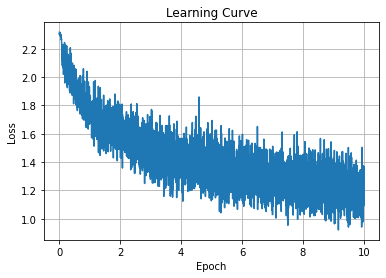

In [ ]:
#PLOT THE LEARNING CURVE
iterations = np.linspace(0,epoch,num_of_batch*epoch)
plt.plot(iterations, loss_values)
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid('on')
plt.savefig('drive/MyDrive/583_HW7/Q6.png')

In [ ]:
#TEST THE MODEL
model.eval()
correct=0
total=0

for x_val, y_val in test_generator:
  x_val = x_val.to(device)
  y_val = y_val.to(device)

  output = model(x_val)
  y_pred = output.argmax(dim=1)

  for i in range(y_pred.shape[0]):
    if y_val[i]==y_pred[i]:
      correct += 1
    total +=1

print('Validation accuracy: %.2f%%' %((100*correct)//(total)))  

Validation accuracy: 55.00%


**Previous experiment showed that pooling layers are useful for the network. Adding one extra convolutional layer increased the number of layers in the network, hence would normally increase the capability of fitting more complex functions. However, with this $3^{rd}$ convolutional layer, the weights of the network significanly decreased to half, hence we cannot deduce a meaningful conclusion from this experiment. Instead one can try more convolutional layers and more units in FCLs.**

## Q7
### Increase the output size of the first convolutional layer

In [ ]:
#DEFINE NEURAL NETWORK MODEL
class CNNQ7(torch.nn.Module):
  def __init__(self):
    super(CNNQ7, self).__init__()
    self.conv1 = torch.nn.Conv2d(3, 32, kernel_size = 4, stride = 1)
    self.conv2 = torch.nn.Conv2d(32, 64, kernel_size = 4, stride = 1)
    self.conv3 = torch.nn.Conv2d(64, 32, kernel_size = 4, stride = 1)
    self.mpool = torch.nn.MaxPool2d(2)
    self.fc1 = torch.nn.Linear(128, 1024)
    self.fc2 = torch.nn.Linear(1024, 256)    
    self.fc3 = torch.nn.Linear(256, 10)
    self.relu = torch.nn.ReLU()
    self.sigmoid = torch.nn.Sigmoid()
    self.drop = torch.nn.Dropout(0.1)
  def forward(self, x):
    hidden = self.mpool(self.relu(self.conv1(x)))
    hidden = self.mpool(self.relu(self.conv2(hidden)))
    hidden = (self.relu(self.conv3(hidden)))
    hidden = hidden.view(-1,128)
    hidden = self.relu(self.fc1(hidden))
    hidden = self.relu(self.fc2(hidden))
    output = self.fc3(hidden)
    return output

In [ ]:
#CREATE MODEL
model = CNNQ7()
model.to(device)

#DEFINE LOSS FUNCTION AND OPTIMIZER
learning_rate = 0.001

loss_fun = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# SUMMARY
summary(model,(3,32,32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 29, 29]           1,568
              ReLU-2           [-1, 32, 29, 29]               0
         MaxPool2d-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 64, 11, 11]          32,832
              ReLU-5           [-1, 64, 11, 11]               0
         MaxPool2d-6             [-1, 64, 5, 5]               0
            Conv2d-7             [-1, 32, 2, 2]          32,800
              ReLU-8             [-1, 32, 2, 2]               0
            Linear-9                 [-1, 1024]         132,096
             ReLU-10                 [-1, 1024]               0
           Linear-11                  [-1, 256]         262,400
             ReLU-12                  [-1, 256]               0
           Linear-13                   [-1, 10]           2,570
Total params: 464,266
Trainable params:

In [ ]:
#TRAIN THE MODEL
model.train()
epoch = 10

num_of_batch=np.int(len(train_generator.dataset)/batch_size)

loss_values = np.zeros(epoch*num_of_batch)
for i in range(epoch):
  for batch_idx, (x_train, y_train) in enumerate(train_generator):
    x_train, y_train = x_train.to(device), y_train.to(device)
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = loss_fun(y_pred, y_train)
    loss_values[num_of_batch*i+batch_idx] = loss.item()
    loss.backward()
    optimizer.step()
    if (batch_idx+1) % batch_size == 0:
        print('Epoch: {}/{} [Batch: {}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            i+1, epoch, (batch_idx+1) * len(x_train), len(train_generator.dataset),
            100. * (batch_idx+1) / len(train_generator), loss.item()))    

Epoch: 1/10 [Batch: 10000/50000 (20%)]	Loss: 1.867347
Epoch: 1/10 [Batch: 20000/50000 (40%)]	Loss: 1.461807
Epoch: 1/10 [Batch: 30000/50000 (60%)]	Loss: 1.482144
Epoch: 1/10 [Batch: 40000/50000 (80%)]	Loss: 1.393044
Epoch: 1/10 [Batch: 50000/50000 (100%)]	Loss: 1.518363
Epoch: 2/10 [Batch: 10000/50000 (20%)]	Loss: 1.452963
Epoch: 2/10 [Batch: 20000/50000 (40%)]	Loss: 1.290976
Epoch: 2/10 [Batch: 30000/50000 (60%)]	Loss: 1.135127
Epoch: 2/10 [Batch: 40000/50000 (80%)]	Loss: 1.257475
Epoch: 2/10 [Batch: 50000/50000 (100%)]	Loss: 1.210437
Epoch: 3/10 [Batch: 10000/50000 (20%)]	Loss: 1.235606
Epoch: 3/10 [Batch: 20000/50000 (40%)]	Loss: 1.298739
Epoch: 3/10 [Batch: 30000/50000 (60%)]	Loss: 1.053390
Epoch: 3/10 [Batch: 40000/50000 (80%)]	Loss: 1.167737
Epoch: 3/10 [Batch: 50000/50000 (100%)]	Loss: 1.064261
Epoch: 4/10 [Batch: 10000/50000 (20%)]	Loss: 0.997144
Epoch: 4/10 [Batch: 20000/50000 (40%)]	Loss: 1.166536
Epoch: 4/10 [Batch: 30000/50000 (60%)]	Loss: 1.001357
Epoch: 4/10 [Batch: 40000

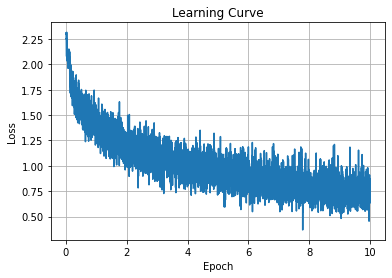

In [ ]:
#PLOT THE LEARNING CURVE
iterations = np.linspace(0,epoch,num_of_batch*epoch)
plt.plot(iterations, loss_values)
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid('on')
plt.savefig('drive/MyDrive/583_HW7/Q7.png')

In [ ]:
#TEST THE MODEL
model.eval()
correct=0
total=0

for x_val, y_val in test_generator:
  x_val = x_val.to(device)
  y_val = y_val.to(device)

  output = model(x_val)
  y_pred = output.argmax(dim=1)

  for i in range(y_pred.shape[0]):
    if y_val[i]==y_pred[i]:
      correct += 1
    total +=1

print('Validation accuracy: %.2f%%' %((100*correct)//(total)))  

Validation accuracy: 68.00%


**As proposed in the previous question, with a bigger network (with more parameters), the training loss significantly decreased even with respect to the network in Q6. And it resulted in an $13\%$ increase in the validation accuracy.**

## Q8 
### Free design 

In [172]:
#DEFINE NEURAL NETWORK MODEL
class CNNQ8(torch.nn.Module):
  def __init__(self):
    super(CNNQ8, self).__init__()
    self.conv1 = torch.nn.Conv2d(3, 32, kernel_size = 3, stride = 1)
    self.conv2 = torch.nn.Conv2d(32, 64, kernel_size = 3, stride = 1)
    self.conv3 = torch.nn.Conv2d(64, 128, kernel_size = 3, stride = 1)
    self.conv4 = torch.nn.Conv2d(128, 128, kernel_size = 3, stride = 1)
    self.conv5 = torch.nn.Conv2d(128, 256, kernel_size = 3, stride = 1)
    self.conv6 = torch.nn.Conv2d(256, 256, kernel_size = 3, stride = 1)
    self.mpool = torch.nn.MaxPool2d(2)
    self.fc1 = torch.nn.Linear(3200, 4096)
    self.fc2 = torch.nn.Linear(4096, 1024)    
    self.fc3 = torch.nn.Linear(1024, 10)
    self.relu = torch.nn.ReLU()
    self.sigmoid = torch.nn.Sigmoid()
    self.drop = torch.nn.Dropout(0.1)
    self.conv2bn = torch.nn.BatchNorm2d(64)
    self.conv4bn = torch.nn.BatchNorm2d(128)

  def forward(self, x):
    hidden = self.mpool(self.conv2bn(self.relu(self.conv2(self.relu(self.conv1(x))))))
    hidden = self.mpool(self.conv4bn(self.relu(self.conv4(self.relu(self.conv3(hidden))))))
    #hidden = self.mpool((self.relu(self.conv6(self.conv5(hidden)))))
    hidden = hidden.view(-1,3200)
    hidden = self.relu(self.fc1(self.drop(hidden)))
    hidden = self.relu(self.fc2(self.drop(hidden)))
    output = self.fc3(hidden)
    return output

In [173]:
#CREATE MODEL
model = CNNQ8()
model.to(device)

# NEW IMPORT 
from torch.optim.lr_scheduler import ExponentialLR, ReduceLROnPlateau

#DEFINE LOSS FUNCTION AND OPTIMIZER
learning_rate = 0.001

loss_fun = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=1e-5)
scheduler = ExponentialLR(optimizer, gamma=0.1, verbose=True)

# SUMMARY
summary(model,(3,32,32))


Adjusting learning rate of group 0 to 1.0000e-03.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
              ReLU-2           [-1, 32, 30, 30]               0
            Conv2d-3           [-1, 64, 28, 28]          18,496
              ReLU-4           [-1, 64, 28, 28]               0
       BatchNorm2d-5           [-1, 64, 28, 28]             128
         MaxPool2d-6           [-1, 64, 14, 14]               0
            Conv2d-7          [-1, 128, 12, 12]          73,856
              ReLU-8          [-1, 128, 12, 12]               0
            Conv2d-9          [-1, 128, 10, 10]         147,584
             ReLU-10          [-1, 128, 10, 10]               0
      BatchNorm2d-11          [-1, 128, 10, 10]             256
        MaxPool2d-12            [-1, 128, 5, 5]               0
          Dropout-13                 [-1, 3200]      

In [174]:
#TRAIN THE MODEL
model.train()
epoch = 20

num_of_batch=np.int(len(train_generator.dataset)/batch_size)

loss_values = np.zeros(epoch*num_of_batch)
for i in range(epoch):
  if i in [5, 12, 16]:
    scheduler.step()
  for batch_idx, (x_train, y_train) in enumerate(train_generator):
    x_train, y_train = x_train.to(device), y_train.to(device)
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = loss_fun(y_pred, y_train)
    loss_values[num_of_batch*i+batch_idx] = loss.item()
    loss.backward()
    optimizer.step()
    if (batch_idx+1) % batch_size == 0:
        print('Epoch: {}/{} [Batch: {}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            i+1, epoch, (batch_idx+1) * len(x_train), len(train_generator.dataset),
            100. * (batch_idx+1) / len(train_generator), loss.item()))  


Epoch: 1/20 [Batch: 10000/50000 (20%)]	Loss: 1.515501
Epoch: 1/20 [Batch: 20000/50000 (40%)]	Loss: 1.419433
Epoch: 1/20 [Batch: 30000/50000 (60%)]	Loss: 1.297556
Epoch: 1/20 [Batch: 40000/50000 (80%)]	Loss: 1.002507
Epoch: 1/20 [Batch: 50000/50000 (100%)]	Loss: 1.056283
Epoch: 2/20 [Batch: 10000/50000 (20%)]	Loss: 0.911783
Epoch: 2/20 [Batch: 20000/50000 (40%)]	Loss: 0.871352
Epoch: 2/20 [Batch: 30000/50000 (60%)]	Loss: 0.772256
Epoch: 2/20 [Batch: 40000/50000 (80%)]	Loss: 0.931136
Epoch: 2/20 [Batch: 50000/50000 (100%)]	Loss: 0.537306
Epoch: 3/20 [Batch: 10000/50000 (20%)]	Loss: 0.518227
Epoch: 3/20 [Batch: 20000/50000 (40%)]	Loss: 0.774560
Epoch: 3/20 [Batch: 30000/50000 (60%)]	Loss: 0.491370
Epoch: 3/20 [Batch: 40000/50000 (80%)]	Loss: 0.517129
Epoch: 3/20 [Batch: 50000/50000 (100%)]	Loss: 0.425729
Epoch: 4/20 [Batch: 10000/50000 (20%)]	Loss: 0.340072
Epoch: 4/20 [Batch: 20000/50000 (40%)]	Loss: 0.345048
Epoch: 4/20 [Batch: 30000/50000 (60%)]	Loss: 0.406142
Epoch: 4/20 [Batch: 40000

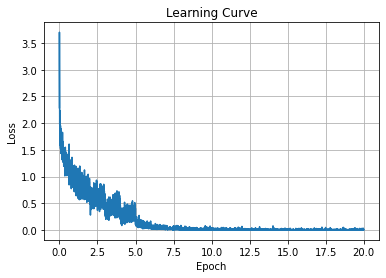

In [175]:
#PLOT THE LEARNING CURVE
iterations = np.linspace(0,epoch,num_of_batch*epoch)
plt.plot(iterations, loss_values)
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid('on')
plt.savefig('drive/MyDrive/583_HW7/Q8.png')

In [176]:
#TEST THE MODEL
model.eval()
correct=0
total=0

for x_val, y_val in test_generator:
  x_val = x_val.to(device)
  y_val = y_val.to(device)

  output = model(x_val)
  y_pred = output.argmax(dim=1)

  for i in range(y_pred.shape[0]):
    if y_val[i]==y_pred[i]:
      correct += 1
    total +=1

print('Validation accuracy: %.2f%%' %((100*correct)//(total)))  

Validation accuracy: 80.00%


**With the introduction of Learning Rate Scheduler, Dropout and Batchnorm Layers to the network, it is able to achieve $80\%$ validation accuracy after 20 epochs.**